## Understanding DCLP5 Dataset
This notebook tries provides details on the structure of the DCLP5 dataset and makes suggestions how to process the data.

## The DCLP5 study

**Title**: The International Diabetes Closed Loop (iDCL) trial: Clinical Acceptance of 
the Artificial Pancreas in Pediatrics - A Pivotal Study of t:slim X2 with Control-IQ Technology

**Description**: The objective of the study is to assess efficacy and safety of a closed loop control (CLC) system (t:slim X2 with Control-IQ Technology) in a randomized controlled trial with partial crossover.
    
**Devices**: t:slim X2 with Control-IQ and Dexcom G6 system

**Study Population**: Children aged 6 - 13 years old

# Data
The study data folder is named **DCLP5_Dataset_2022-01-20-5e0f3b16-c890-4ace-9e3b-531f3687cf53**

While there is a data glossary (DataGlossary_Dits.rtf) file, the file names within the glossary do not match the file names of the data. However, the column names do match and those definitions are listed below.

These are csv files ("|" separator) and host many columns related to the Tandem pump events and the Dexcom cgm. The glossary provides information about each column. Each file contains a limited amount of columns compared to the FLAIR data. 

## Bolus
* **DCLP5TandemBolus_Completed_Combined_b.txt**: List of pupm data downloaded (bolus data only)

| Column            | Description                                      | Comment                              |
|-------------------|--------------------------------------------------|--------------------------------------|
| PtID              | Patient ID                                       |                                      |
| DataDtTm          | Date-time of delivered insulin                   |                                      |
| BolusAmount       | The amount of insulin actually delivered for this bolus | In Glossary this is called InsulinDelivered |
| BolusType         | The bolus insulin delivery type [Standard, Extended] |                                      |
| DataDtTm_adjusted | adjusted Date-time                                | Not mentioned in glossary            |

## Basal
* **DCLP5TandemBASALRATECHG_b.txt**: List of pump data dowloaded (basal data only)  

| Column              | Description                                      | Comment                    |
|---------------------|--------------------------------------------------|----------------------------|
| PtID                | Patient ID                                       |                            |
| DataDtTm            | Date-time of basal rate change                   |                            |
| CommandedBasalRate  | Basal Rate (U/h) - The active basal insulin delivery rate in units per hour |                            |
| DataDtTm_adjusted   | adjusted Date-time                               | Not mentioned in glossary  |

## CGM
There are three CGM files mentioned in the glossary:  
 - DCLP5DexcomClarityCGM (actual name **DexcomClarityCGM**.txt): CGM readings from Dexcom Clarity (G5) files -- Final table with duplicates removed
 - DCLP5OtherCGM (actual name: **OtherCGM.txt**): List of CGM readings from CGM file types for which loading processes have not been set up (e.g. Tandem CGM hourly report, or CGM tab from Diasend file saved as csv, etc)
 - Pump_CGMGlucoseValue (actual name: **DCLP5TandemCGMDATAGXB_b**): CGM glucose value recorded on the pump
 - TandemCGMDATAGXB.txt (this was not mentioned in the data glossary)
 
* **DCLP5TandemCGMDATAGXB_b.txt**: List of cgm data dowloaded 

| Column           | Description                                                                 | Comment                       |
|------------------|-----------------------------------------------------------------------------|-------------------------------|
| PtID             | Patient ID                                                                  |                               |
| DataDtTm         | Date-time                                                                   |                               |
| CGMValue         | 40-400 mg/dL. 40-400 are legitimate glucose values. 0 is used when the reading is high or low. Use of this field depends on the glucoseValueStatus field. | Same as in DCLP3              |
| HighLowIndicator | 0 = CGMValue contains the glucose reading. 1 = The glucose reading is high (CGMValue set to 0). 2 = The glucose reading is low (CGMValue set to 0). |                               |
| DataDtTm_adjusted| Adjusted Date-time                                                          |                               |

### Observations
* Very onfusing differences between Glossary and actual filenames and column names.
 * e.g. there are 4 CGM Files
 * The glossary file names don't match the actual file names
 * The glossary column names are named differently, some are missing
* Overall structure as in DCLP3 but different file names

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
sys.path.append(os.path.join(os.getcwd(), '..'))
from src import date_helper
from datetime import datetime, timedelta

In [34]:
# load the raw data
study_path = os.path.join(os.getcwd(), '../data/raw/DCLP5_Dataset_2022-01-20-5e0f3b16-c890-4ace-9e3b-531f3687cf53')
df_bolus = pd.read_csv(os.path.join(study_path, 'DCLP5TandemBolus_Completed_Combined_b.txt'), sep='|', low_memory=False)
df_basal = pd.read_csv(os.path.join(study_path, 'DCLP5TandemBASALRATECHG_b.txt'), sep='|', low_memory=False)
df_cgm = pd.read_csv(os.path.join(study_path, 'DCLP5TandemCGMDATAGXB_b.txt'), sep='|', low_memory=False)

display(df_bolus.head(1))
display(df_basal.head(1))
display(df_cgm.head(1))

df_bolus.Name = 'Bolus'
df_basal.Name = 'Basal'
df_cgm.Name = 'CGM'

,PtID,RecID,DataDtTm,BolusAmount,BolusType,DataDtTm_adjusted
0,66,2525,8/2/2018 2:36:32 PM,0.53,Standard,NaN


,PtID,RecID,DataDtTm,CommandedBasalRate,DataDtTm_adjusted
0,26,1,4/16/2019 2:37:45 PM,0.45,NaN


,PtID,RecID,DataDtTm,CGMValue,HighLowIndicator,DataDtTm_adjusted
0,26,1,4/17/2019 12:07:54 PM,107,0,NaN


### Duplicates & Missing Data

In [35]:
#check for null values
display(df_cgm.agg('isna').sum())
display(df_bolus.agg('isna').sum())
display(df_basal.agg('isna').sum())

PtID                       0
RecID                      0
DataDtTm                   0
CGMValue                   0
HighLowIndicator           0
DataDtTm_adjusted    5371247
dtype: int64

PtID                      0
RecID                     0
DataDtTm                  0
BolusAmount               0
BolusType                 0
DataDtTm_adjusted    220563
dtype: int64

PtID                        0
RecID                       0
DataDtTm                    0
CommandedBasalRate          0
DataDtTm_adjusted     2466773
dtype: int64

No NaN values, except the adjusted datetimes, that's good.

In [36]:
#check for row duplicates
for dataset in [df_bolus, df_basal, df_cgm]:
    print(f"Duplicated rows in {dataset.Name}: {dataset.duplicated().sum()}")

print(f"Basal Duplicates (PtID, DataDtTm, DataDtTm_adjusted): {df_basal.duplicated(subset=['PtID', 'DataDtTm', 'DataDtTm_adjusted'], keep=False).sum()}")
print(f"Basal Duplicates (PtID, DataDtTm, DataDtTm_adjusted, CommandedBasalRate): {df_basal.duplicated(subset=['PtID', 'DataDtTm', 'DataDtTm_adjusted', 'CommandedBasalRate'], keep=False).sum()}")

print(f"CGM Duplicates (PtID, DataDtTm, DataDtTm_adjusted): {df_cgm.duplicated(subset=['PtID', 'DataDtTm', 'DataDtTm_adjusted'], keep=False).sum()}")
print(f"CGM Duplicates (PtID, DataDtTm, DataDtTm_adjusted, CGMValue): {df_cgm.duplicated(subset=['PtID', 'DataDtTm', 'DataDtTm_adjusted', 'CGMValue'], keep=False).sum()}")

print(f"Bolus Duplicates (PtID, DataDtTm, DataDtTm_adjusted): {df_bolus.duplicated(subset=['PtID', 'DataDtTm', 'DataDtTm_adjusted'], keep=False).sum()}")
print(f"Bolus Duplicates (PtID, DataDtTm, DataDtTm_adjusted, BolusType): {df_bolus.duplicated(subset=['PtID', 'DataDtTm', 'DataDtTm_adjusted', 'BolusType'], keep=False).sum()}")

Duplicated rows in Bolus: 0
Duplicated rows in Basal: 0
Duplicated rows in CGM: 0
Basal Duplicates (PtID, DataDtTm, DataDtTm_adjusted): 4290
Basal Duplicates (PtID, DataDtTm, DataDtTm_adjusted, CommandedBasalRate): 4270
CGM Duplicates (PtID, DataDtTm, DataDtTm_adjusted): 3262
CGM Duplicates (PtID, DataDtTm, DataDtTm_adjusted, CGMValue): 3254
Bolus Duplicates (PtID, DataDtTm, DataDtTm_adjusted): 124
Bolus Duplicates (PtID, DataDtTm, DataDtTm_adjusted, BolusType): 0


There are no compelte row duplicates (e.g. also considering record id)

When only checking for PtID, DataDtTm, and DataDtTm_adjusted:  

 * 4290 basal rates reported at the same time (but most of them are equal)
 * 3262 cgm duplicates (but most share the same value)
 * 124 bolus duplicates (but all have different bolus types) (extended, normal) --> no real duplicates

We deal with duplicates as follows:  

* Basal: Taking the maximum value (we see some zero values)
* CGM: Taking the first value
* Bolus, we handle later in the Extended Bolus section

In [37]:
#drop duplicates either taking max or first value
from src import pandas_helper

df_cgm.drop_duplicates(['PtID', 'DataDtTm'], keep='first', inplace=True)

_, _, drop_indexes = pandas_helper.get_duplicated_max_indexes(df_basal, ['PtID', 'DataDtTm'], 'CommandedBasalRate')
df_basal.drop(drop_indexes, inplace=True)

### Keep only patients with complete data

In [38]:
from functools import reduce

print(f"Unique patients: Basal: {len(df_basal.PtID.unique())}, Bolus: {len(df_bolus.PtID.unique())}, CGM: {len(df_cgm.PtID.unique())}")

#reduce to those with data in all datasets
total_ids = reduce(np.intersect1d, (df_basal.PtID.unique(), df_bolus.PtID.unique(), df_cgm.PtID.unique()))
print('Total PtIDs with all forms of data: ', len(total_ids))

#filter out those without data in all datasets
#df_basal = df_basal[df_basal.PtID.isin(total_ids)]
#df_bolus = df_bolus[df_bolus.PtID.isin(total_ids)]
#df_cgm = df_cgm[df_cgm.PtID.isin(total_ids)]

Unique patients: Basal: 100, Bolus: 100, CGM: 100
Total PtIDs with all forms of data:  100


There is no need to filter patient data as all patients have complete data. 

### DateTime Strings
In Flair and PEDAP datetime strings were reported in inconsistent time formats: time components were missing at midnights which required special handling.

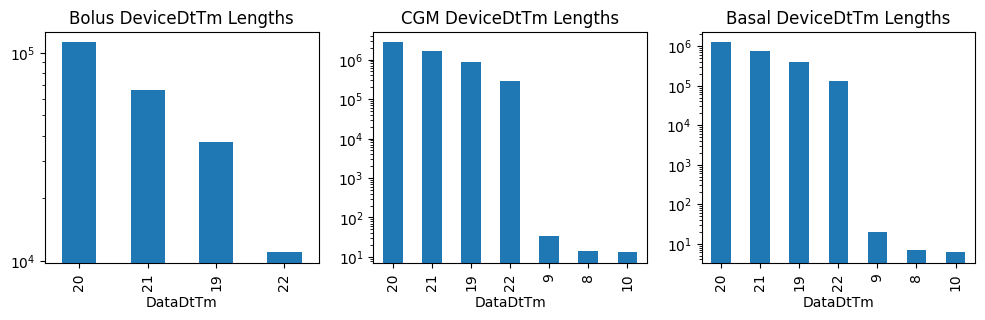

Example for 20 characters in Bolus: 7/25/2019 9:58:36 AM
Example for 21 characters in Bolus: 12/19/2018 1:54:57 PM
Example for 19 characters in Bolus: 8/2/2018 2:36:32 PM
Example for 22 characters in Bolus: 10/29/2018 11:42:25 AM
Example for 20 characters in CGM: 4/17/2019 1:07:52 PM
Example for 21 characters in CGM: 4/17/2019 12:07:54 PM
Example for 19 characters in CGM: 9/7/2018 7:21:30 AM
Example for 22 characters in CGM: 11/17/2018 10:00:48 PM
Example for 9 characters in CGM: 7/13/2018
Example for 8 characters in CGM: 4/9/2019
Example for 10 characters in CGM: 12/15/2018
Example for 20 characters in Basal: 4/16/2019 2:37:45 PM
Example for 21 characters in Basal: 4/17/2019 12:24:17 PM
Example for 19 characters in Basal: 9/7/2018 7:37:52 AM
Example for 22 characters in Basal: 11/17/2018 10:25:28 PM
Example for 9 characters in Basal: 8/24/2018
Example for 8 characters in Basal: 8/4/2019
Example for 10 characters in Basal: 11/21/2018
Missing datetime values in bolus: 0
Missing datetime

In [39]:
#check datetime string lengths
datetime_column = 'DataDtTm'
df_bolus.Name = 'Bolus'
df_basal.Name = 'Basal'
df_cgm.Name = 'CGM'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
df_bolus[datetime_column].str.len().value_counts().plot.bar(ax=axes[0], title='Bolus DeviceDtTm Lengths', logy=True)
df_cgm[datetime_column].str.len().value_counts().plot.bar(ax=axes[1], title='CGM DeviceDtTm Lengths', logy=True)
df_basal[datetime_column].str.len().value_counts().plot.bar(ax=axes[2], title='Basal DeviceDtTm Lengths', logy=True)
plt.show()

#print examples of the different string lengths (if exists)
for dataset in [df_bolus, df_cgm, df_basal]:
    value_counts = dataset[datetime_column].str.len().value_counts()
    for length, count in value_counts.items():
        print(f"Example for {length} characters in {dataset.Name}: {dataset[datetime_column][dataset[datetime_column].str.len() == length].iloc[0]}")

#check if there are missing datetime values
print(f"Missing datetime values in bolus: {df_bolus['DataDtTm'].isnull().sum()}")
print(f"Missing datetime values in basal: {df_basal['DataDtTm'].isnull().sum()}")
print(f"Missing datetime values in cgm: {df_cgm['DataDtTm'].isnull().sum()}")

As we can see
 - As in flair, we see datetimes with missing time component, even if it is only a few instances
 - The date formats are different from DCLP3 and PEDAP 
  - DCLP3: `%Y-%m-%d %H:%M:%S`
  - DCLP5/PEDAP: `%-m/%-d/%Y %I:%M:%S %p`
 - there are no missing datetimes

We therefore, again check if the missing time components align with midnight by checking a few examples:

In [ ]:
from importlib import reload
reload(date_helper)

<module 'src.date_helper' from '/Users/jan/git/nudgebg/egvinsulin/notebooks/../src/date_helper.py'>

In [106]:
#convert the datetime strings to datetime objects
datetime_column = 'datetime'
datetime_adjusted_column = 'datetime_adjusted'

df_bolus[datetime_column] = df_bolus.loc[df_bolus.DataDtTm.notna(),'DataDtTm'].transform(date_helper.parse_flair_dates, format_date='%m/%d/%Y', format_time='%I:%M:%S %p')
df_basal[datetime_column] = df_basal.loc[df_basal.DataDtTm.notna(),'DataDtTm'].transform(date_helper.parse_flair_dates, format_date='%m/%d/%Y', format_time='%I:%M:%S %p')
df_cgm[datetime_column] = df_cgm.loc[df_cgm.DataDtTm.notna(),'DataDtTm'].transform(date_helper.parse_flair_dates, format_date='%m/%d/%Y', format_time='%I:%M:%S %p')
df_bolus[datetime_adjusted_column] = df_bolus.loc[df_bolus.DataDtTm_adjusted.notna(),'DataDtTm_adjusted'].transform(date_helper.parse_flair_dates, format_date='%m/%d/%Y', format_time='%I:%M:%S %p')
df_basal[datetime_adjusted_column] = df_basal.loc[df_basal.DataDtTm_adjusted.notna(),'DataDtTm_adjusted'].transform(date_helper.parse_flair_dates, format_date='%m/%d/%Y', format_time='%I:%M:%S %p')
df_cgm[datetime_adjusted_column] = df_cgm.loc[df_cgm.DataDtTm_adjusted.notna(),'DataDtTm_adjusted'].transform(date_helper.parse_flair_dates, format_date='%m/%d/%Y', format_time='%I:%M:%S %p')

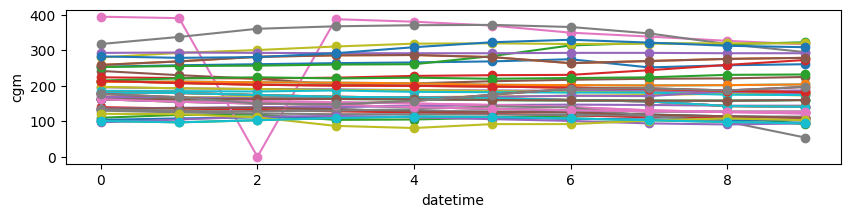

In [ ]:
df_cgm.sort_values(['PtID', datetime_column], inplace=True)
temp = df_cgm.loc[df_cgm.DataDtTm.str.len()<=10]
plt.figure(figsize=(10, 2))
for _ in range(50):
    row = temp.sample(1).iloc[0]
    i_loc=df_cgm.index.get_loc(row.name)
    sample_data = df_cgm.iloc[i_loc-5:i_loc+5]
    plt.plot(np.arange(0,10,1), sample_data['CGMValue'], marker='o')
plt.xlabel('datetime')
plt.ylabel('cgm')

What we see is that the 5th value (which is the one with the missing time component) snuggly fits the series. Therefore, we can safely assume it is in fact the midnight. The drops to zero are just because because they are out of range. 

In [ ]:
#drop the old datetime columns
df_cgm.drop(columns=['DataDtTm', 'DataDtTm_adjusted'], inplace=True)
df_bolus.drop(columns=['DataDtTm', 'DataDtTm_adjusted'], inplace=True)
df_basal.drop(columns=['DataDtTm', 'DataDtTm_adjusted'], inplace=True)

### Adjusted Datetimes

We know there are datetime adjusted events, let's investigate:

In [111]:
#check for adjusted datetime durations
bolus_adjusted_percentage = df_bolus[datetime_adjusted_column].notna().mean() * 100
basal_adjusted_percentage = df_basal[datetime_adjusted_column].notna().mean() * 100
cgm_adjusted_percentage = df_cgm[datetime_adjusted_column].notna().mean() * 100

print(f"Adjusted boluses: {bolus_adjusted_percentage:.2f}%")
print(f"Adjusted basals: {basal_adjusted_percentage:.2f}%")
print(f"Adjusted cgms: {cgm_adjusted_percentage:.2f}%")

#describe the adjustment duration
display((df_cgm[datetime_adjusted_column]-df_cgm[datetime_column]).describe())

Adjusted boluses: 2.70%
Adjusted basals: 2.58%
Adjusted cgms: 2.99%


count                       165402
mean     0 days 02:34:55.785117471
std      7 days 17:33:20.104428258
min              -2 days +20:00:00
25%              -1 days +23:00:00
50%                0 days 00:10:00
75%                0 days 01:00:00
max              365 days 00:00:00
dtype: object

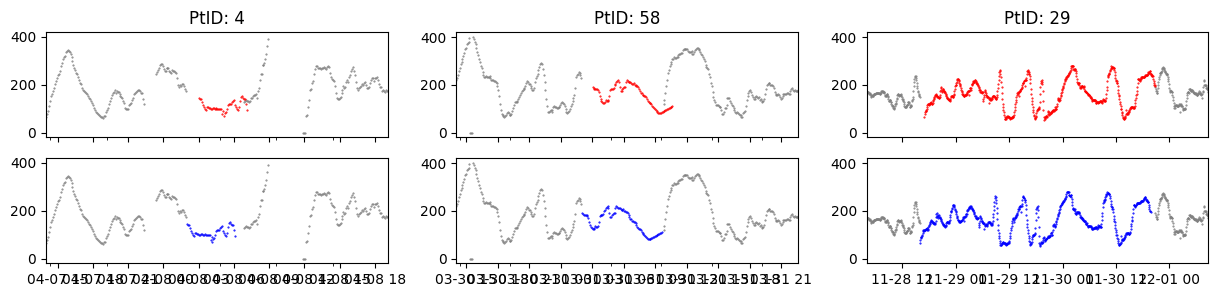

In [117]:
# plot cgm data using the adjusted vs. unadjusted datetime values

def split_groups(x: pd.Series, threshold) -> pd.Series:
    """Assigns unique group IDs based on the distance between consecutive values.

    Args:
         x (pd.Series): Series of numerical values.
         threshold : The maximum duration between two consecutive values to consider them in the same group.

    Returns:
         (pd.Series): The Series containing the data.
    """
    
    return (x.diff()>threshold).cumsum()

# Example usage for the first three patients
cgm_col = 'CGMValue'

#get patient ids
patients_with_adj_datetimes = df_cgm.loc[df_cgm[datetime_adjusted_column].notnull()]['PtID'].unique()

#Plot the cgm data for the three patients
f, AX = plt.subplots(2, 3, figsize=(15, 3), sharex='col')
for i_patient, patient_id in enumerate(np.random.choice(patients_with_adj_datetimes, 3)):
     temp = df_cgm.loc[df_cgm.PtID == patient_id]
     temp.loc[temp[datetime_adjusted_column].isnull()].plot.scatter(x=datetime_column, y=cgm_col, s=1, marker='.', ax=AX[0, i_patient], color='gray')
     temp.loc[temp[datetime_adjusted_column].isnull()].plot.scatter(x=datetime_column, y=cgm_col, s=1, marker='.', ax=AX[1, i_patient], color='gray')

     temp.loc[temp[datetime_adjusted_column].notnull()].plot.scatter(x=datetime_column, y=cgm_col, s=1, marker='.', ax=AX[0, i_patient], color='red')
     temp.loc[temp[datetime_adjusted_column].notnull()].plot.scatter(x=datetime_adjusted_column, y=cgm_col, s=1, marker='.', ax=AX[1, i_patient], color='blue')

     #limit the x-axis to the first group of adjusted datetime values
     group_labels = split_groups(temp[datetime_adjusted_column].dropna(), timedelta(days=1))
     first_group = temp.groupby(group_labels).get_group(0)
     
     start, end = first_group[datetime_column].agg(['min', 'max'])
     start2, end2 = first_group[datetime_adjusted_column].agg(['min', 'max'])
     
     start, end = min(start, start2), max(end, end2)

     AX[0][i_patient].set_xlim([start - timedelta(hours=12), end + timedelta(hours=12)])
     AX[0][i_patient].set_title("PtID: " + str(patient_id))
     AX[1][i_patient].set_xlabel('')
     AX[0][i_patient].set_ylabel('')
     AX[1][i_patient].set_ylabel('')


In [118]:
# Compare the time difference between consecutive values before and after the adjustment
df_cgm[datetime_adjusted_column] = df_cgm[datetime_adjusted_column].fillna(df_cgm[datetime_column])
before = df_cgm.sort_values(datetime_column).dropna(subset=[datetime_column]).groupby('PtID')[datetime_column].agg('diff').describe()
after = df_cgm.sort_values(datetime_adjusted_column).dropna(subset=[datetime_adjusted_column]).groupby('PtID')[datetime_adjusted_column].agg('diff').describe()
pd.DataFrame({'Before': before, 'After': after})

,Before,After
count,5535006,5535006
mean,0 days 00:05:22.066248889,0 days 00:05:16.926022483
std,0 days 03:43:48.740257256,0 days 01:35:10.111699954
min,0 days 00:00:01,0 days 00:00:00
25%,0 days 00:04:59,0 days 00:04:59
50%,0 days 00:05:00,0 days 00:05:00
75%,0 days 00:05:01,0 days 00:05:01
max,330 days 22:46:25,145 days 19:24:32


**Conclusion**: As we can see, using the adjusted datetimes moves the cgm data in the right spot (mostly) and reduces the variation in time differences. 

In [119]:
# assign the adjusted datetime values to the datetime column, drop other columns
df_cgm.drop(columns=[datetime_adjusted_column], inplace=True)
df_basal.drop(columns=[datetime_adjusted_column], inplace=True)
df_bolus.drop(columns=[datetime_adjusted_column], inplace=True)

## CGM data

### Replace Zero CGMs
From the data glossary we know that 0 cgm values are either below or above range. 
>0 =CGMValue contains the glucose reading  
>1 =The glucose reading is high~ CGMValue set to 0  
>2 =The glucose reading is low~ CGMValue set to 0

Here, we quickly check the distribution and replace 0 CGMs with the measurement range.

CGMValue
0      0.691026
400    0.010930
Name: Percentage of CGM values, dtype: float64

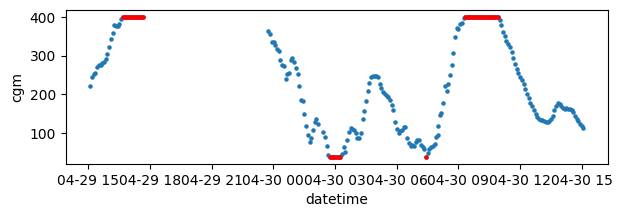

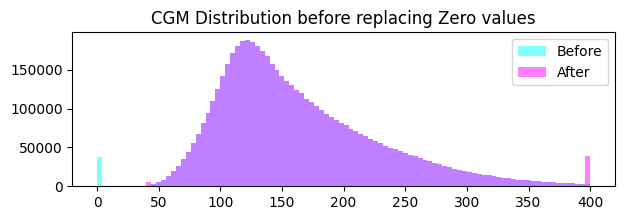

In [121]:
#draw cgm distribution
from src import cdf
#describe
temp = df_cgm.CGMValue[df_cgm.CGMValue.isin([0,400])].value_counts()/len(df_cgm)*100
temp.name = 'Percentage of CGM values'
display(temp)

# replace Zero CGMs with lower upper bounds
df_cgm['cgm'] = df_cgm['CGMValue']
i_zero = df_cgm.CGMValue == 0
df_cgm.loc[i_zero, 'cgm'] = df_cgm.HighLowIndicator.loc[i_zero].replace({ 2: 40, 1: 400 })

# draw an example
(patient_id,zero_datetime) = df_cgm.loc[(df_cgm.CGMValue==0),['PtID','datetime']].sample().iloc[0]
surrounding_cgms = df_cgm.loc[(df_cgm.PtID==patient_id) & 
                              df_cgm.datetime.between(zero_datetime-timedelta(hours=12), 
                                                      zero_datetime+timedelta(hours=12))].copy()

plt.figure(figsize=(7, 2)); ax = plt.gca()
surrounding_cgms.plot.scatter('datetime', 'cgm',ax=ax, marker='.')
surrounding_cgms.loc[surrounding_cgms.CGMValue==0].plot.scatter('datetime', 'cgm',color='red',ax=ax, marker='.');


#histogram
plt.figure(figsize=(7, 2))
plt.hist(df_cgm.CGMValue, bins=100, range=(0,400), alpha=0.5,label='Before',color='cyan')
plt.hist(df_cgm.cgm, bins=100, range=(0,400), alpha=0.5,label='After', color='magenta')
plt.legend()
plt.title("CGM Distribution before replacing Zero values");


## Datetimes are local and aligned
We want to make sure that datetimes of all datasets are in local time.

The DCLP3 data glossary makes no mention of UTC, timezone or zone. All datetime variables are described as local times. We want to verify by checking the distribution of mean CGM, basal rates and bolus doses to verify we see postprandial peaks in the morning, afternoon and evening as well as more stable glucose during the night.

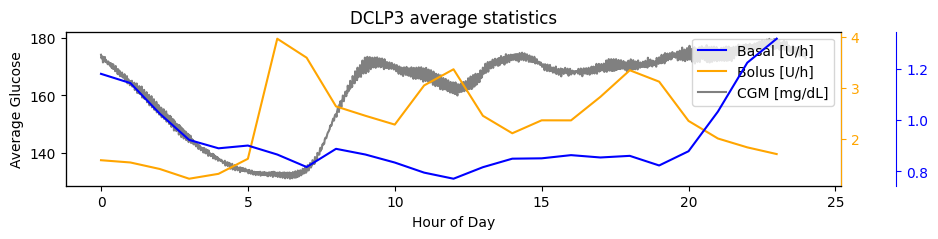

In [122]:
plt.figure(figsize=(10, 2)); ax=plt.gca()
df_cgm['date'] = df_cgm.datetime.dt.date
df_cgm['hour_of_day'] = df_cgm.datetime.dt.hour+df_cgm.datetime.dt.minute/60
agg = df_cgm.groupby(['PtID','hour_of_day']).CGMValue.mean()
agg.unstack().mean().plot(title='DCLP3 average statistics', xlabel='Hour of Day', ylabel='Average Glucose', ax=ax, color='gray')

#bolus
twin_ax = ax.twinx()
df_bolus['date'] = df_bolus.datetime.dt.date
df_bolus['hour_of_day'] = df_bolus.datetime.dt.hour
agg = df_bolus.groupby(['PtID','date','hour_of_day']).BolusAmount.sum()
agg.unstack().mean().plot(ax=twin_ax,color='orange')
#twin_ax.set_ylabel('Units',color='orange')
twin_ax.spines['right'].set_color('orange')
twin_ax.tick_params(axis='y', colors='orange')

#basal
twin_ax2 = ax.twinx()
df_basal['date'] = df_basal.datetime.dt.date
df_basal['hour_of_day'] = df_basal.datetime.dt.hour
agg = df_basal.groupby(['PtID','date','hour_of_day']).CommandedBasalRate.mean()
agg.unstack().mean().plot(ax=twin_ax2,color='blue')
#twin_ax2.set_ylabel('U/h', color='blue')
twin_ax2.spines['right'].set_position(('outward', 40))
twin_ax2.spines['right'].set_color('blue')
twin_ax2.tick_params(axis='y', colors='blue')

# Add color legend for the three plots
ax.plot([], [], color='blue', label='Basal [U/h]')
ax.plot([], [], color='orange', label='Bolus [U/h]')
ax.plot([], [], color='gray', label='CGM [mg/dL]')
ax.legend(loc='upper right')


We see bolus peaks at around 7 oClock, noon and evening. Slightly delayed we see postprandial glucose peaks as expected. Due to Control IQ basal increase after dinner signifiucantluy slowly decreasing over night. This all makes sense and we can safely assume that all datetimes are in local time. 

## Boluses

### Bolus Duplicates
There are no bolus duplicates when including the BolusType column. The duplicates in boluses seem to be a result of Standard and Extended Bolus portions being reported at the same time. Is this true for all exteded boluses? Let's check.

In [123]:
print(f"Value Counts All Boluses: {df_bolus.BolusType.value_counts()}\n")
duplicated = df_bolus.loc[df_bolus.duplicated(['PtID', 'datetime'], keep=False)].sort_values(['PtID', 'datetime'])
print(f"Value Counts Duplicated Boluses: {duplicated.BolusType.value_counts()}")

Value Counts All Boluses: BolusType
Standard    223516
Extended      3169
Name: count, dtype: int64

Value Counts Duplicated Boluses: BolusType
Standard    62
Extended    62
Name: count, dtype: int64


### Extended Boluses
There are 3169 extended boluses (~1.4% of the boluses). We apply the same logic as in DCLP3 for matching standard and extended boluses.

/var/folders/m4/5d02b2xs0l52lbxzbk0t3vym0000gp/T/ipykernel_27734/2088633393.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  periods = df_bolus.groupby('PtID').apply(lambda x: find_periods.find_periods(x,'BolusType','datetime',


,index_start,index_end,time_start,time_end,PtID
0,104003,223517,2018-11-18 19:01:20,2018-11-18 20:12:36,1
1,94158,223516,2018-11-21 20:17:54,2018-11-21 22:07:46,1
2,187631,223518,2018-12-01 19:01:40,2018-12-01 20:44:06,1
3,140740,223519,2019-02-28 17:16:33,2019-02-28 19:16:32,1
4,194795,223679,2018-05-21 19:45:16,2018-05-21 20:42:08,2
...,...,...,...,...,...
3131,118075,223603,2018-12-19 20:55:33,2018-12-19 21:09:34,101
3132,218439,223606,2018-12-20 19:00:05,2018-12-20 19:23:24,101
3133,38763,223607,2018-12-25 11:58:21,2018-12-25 12:54:28,101
3134,193735,223608,2019-01-04 16:24:55,2019-01-04 16:55:10,101


,index_start,index_end,time_start,time_end,PtID
2368,36423,225875,2019-04-14 22:33:21,2019-04-15 00:33:40,63
2994,135358,226591,2019-10-02 19:01:06,2019-10-02 20:49:22,90


,PtID,RecID,BolusAmount,BolusType,datetime,date,hour_of_day
36423,63,71706,1.5,Standard,2019-04-14 22:33:21,2019-04-14,22
225875,63,1104,1.5,Extended,2019-04-15 00:33:40,2019-04-15,0


,PtID,RecID,BolusAmount,BolusType,datetime,date,hour_of_day
135358,90,353596,3.112000,Standard,2019-10-02 19:01:06,2019-10-02,19
226591,90,5208,4.276568,Extended,2019-10-02 20:49:22,2019-10-02,20


We found 3136 periods for 3169 extended boluses
Mean (STD) [MEDIAN] of extended boluses: 63.72 (49.83), [55.47] minutes


(0.0, 500.0)

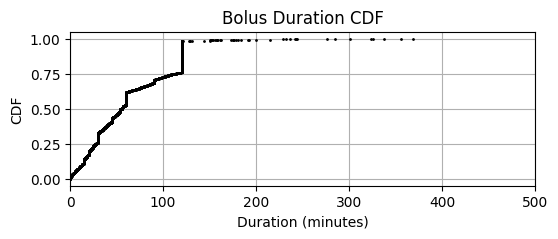

In [129]:
from src import find_periods
from importlib import reload
reload(find_periods)
periods = df_bolus.groupby('PtID').apply(lambda x: find_periods.find_periods(x,'BolusType','datetime',
                          lambda x: x =='Standard', 
                          lambda x: x=='Extended', use_last_start_occurence=True))
#drop rows with empty periods
periods = periods[periods.apply(lambda x: len(x)>0)]

#convert to dataframe, with one row per period
periods = pd.DataFrame(periods.explode(),columns=['Periods'])
PtIDs= periods.index
periods = pd.DataFrame(periods.Periods.tolist(), columns=find_periods.Period._fields)
periods['PtID'] = PtIDs

display(periods)

#show a sample
sample = periods.sample(2)
display(sample)
for index, row in sample.iterrows():
    display(df_bolus.loc[[row.index_start, row.index_end]])

print(f"We found {len(periods)} periods for {(df_bolus.BolusType=='Extended').sum()} extended boluses")

#plot CDF
durations = (periods.time_end-periods.time_start).dt.total_seconds()/60
print(f"Mean (STD) [MEDIAN] of extended boluses: {durations.mean():.2f} ({durations.std():.2f}), [{durations.median():.2f}] minutes")
plt.figure(figsize=(6,2)); ax = plt.gca()
cdf.plot_cdf(durations, title='Bolus Duration CDF', xlabel='Duration (minutes)', ylabel='CDF', linewidth=0, ax = ax)
plt.xlim(0,500)

In comparison **DCLP3**: Mean (STD) [MEDIAN] of extended boluses: 59.02 (46.28), [55.42] minutes  
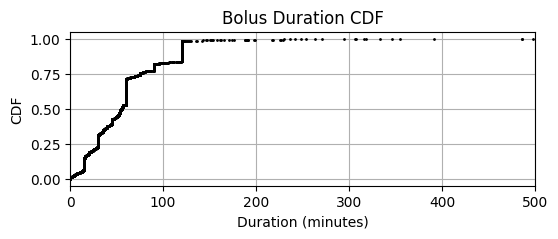

In [130]:
# Durations >8h
extremes = periods.loc[durations > 8*60]
print(f"We found {len(extremes)} periods >8h")

We found 4 periods >8h


As we can see we won't be able to clearly separate dual wave boluses (standard followed by an extended part) from *orphan* extended boluses (without standard part): Orphan Extended boluses will be incorretly matched to the previus standard bolus.However, this will happen only to a small percentage (In PEDAP only ~2% (170 out of 6460)) extended boluses did not have a standard bolus part. The T-Slim X2 allows durations >=8 hours, therefore pairs matched with durations >8 hours are definitely wrong.

Moving forward, we will 
1. assume that extended boluses are reported upon completion (as in PEDAP)
2. Estimate delivery_duration: 
  - Standard boluses: set to 0
  - Extended boluses: time difference to their matched standard boluses
  - Durations >8h (those are definitely matched incorrectly) will be set to 55 minutes (median value) 

In [131]:
#setting the durations
periods['Duration'] = periods.time_end - periods.time_start
periods.loc[periods.Duration>timedelta(hours=8), 'Duration'] = timedelta(minutes=55)

df_bolus['Duration'] = 0
df_bolus.loc[periods.index_end, 'datetime'] = (periods.time_end - periods.Duration).values
df_bolus.loc[periods.index_end, 'Duration'] = (periods.Duration.dt.total_seconds()/60).values
df_bolus.loc[periods.index_end]

/var/folders/m4/5d02b2xs0l52lbxzbk0t3vym0000gp/T/ipykernel_27734/1256055155.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 71.26666667 109.86666667 102.43333333 ...  56.11666667  30.25
  53.23333333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_bolus.loc[periods.index_end, 'Duration'] = (periods.Duration.dt.total_seconds()/60).values


,PtID,RecID,BolusAmount,BolusType,datetime,date,hour_of_day,Duration
223517,1,40,1.700417,Extended,2018-11-18 19:01:20,2018-11-18,20,71.266667
223516,1,39,5.000000,Extended,2018-11-21 20:17:54,2018-11-21,22,109.866667
223518,1,41,2.915000,Extended,2018-12-01 19:01:40,2018-12-01,20,102.433333
223519,1,4124,3.335000,Extended,2019-02-28 17:16:33,2019-02-28,19,119.983333
223679,2,468,0.590000,Extended,2018-05-21 19:45:16,2018-05-21,20,56.866667
...,...,...,...,...,...,...,...,...
223603,101,4285,1.568000,Extended,2018-12-19 20:55:33,2018-12-19,21,14.016667
223606,101,4413,1.800000,Extended,2018-12-20 19:00:05,2018-12-20,19,23.316667
223607,101,4524,1.464000,Extended,2018-12-25 11:58:21,2018-12-25,12,56.116667
223608,101,4650,0.806200,Extended,2019-01-04 16:24:55,2019-01-04,16,30.250000


In [132]:
display(periods.Duration.describe())

count                         3136
mean     0 days 01:02:53.564732142
std      0 days 00:44:14.616390760
min                0 days 00:00:00
25%         0 days 00:28:06.250000
50%         0 days 00:55:14.500000
75%         0 days 01:52:28.250000
max                0 days 06:08:42
Name: Duration, dtype: object

## Basals

In PEDAP, we confirmed that basal rate change events are reported whenever basal delivery changes, not only if the new basal rate deviates from standard basal rate. Here, we apply the same logic and assume all basal rate changes are present.